In [23]:
#Import libraries

import pandas as pd
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

In [24]:
#Load data
df = pd.read_csv('book (1).csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [25]:
#Minimum support = 0.1

score1 = apriori(df, min_support=0.1, use_colnames=True)
score1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [26]:
#Minimum support = 0.2

score2 = apriori(df, min_support=0.2, use_colnames=True)
score2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [27]:
#Minimum support = 0.3

score3 = apriori(df, min_support=0.3, use_colnames=True)
score3

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [28]:
#Minimum support = 0.4

score4 = apriori(df, min_support=0.4, use_colnames=True)
score4

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [29]:
#Minimum support = 0.5

score5 = apriori(df, min_support=0.5, use_colnames=True)
score5

,support,itemsets


In [30]:
#let us bulid the model for score1 which has min_support= 0.2

model = association_rules(score1)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


In [31]:
#print all the good models using lift>1
model[model['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


# Visualization

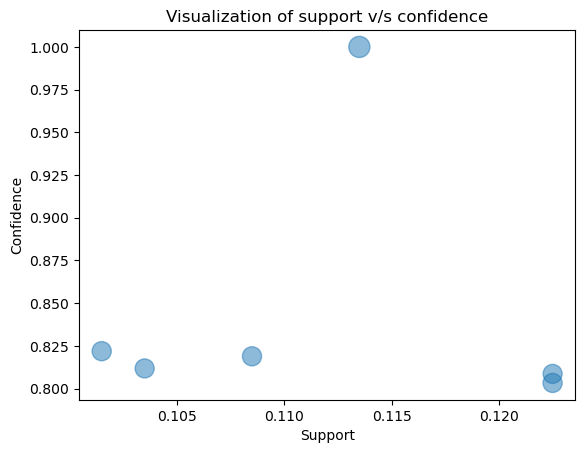

In [36]:
import matplotlib.pyplot as plt

plt.scatter(model['support'], model['confidence'], s=model['lift']*100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Visualization of support v/s confidence')
plt.show()

# Network graph

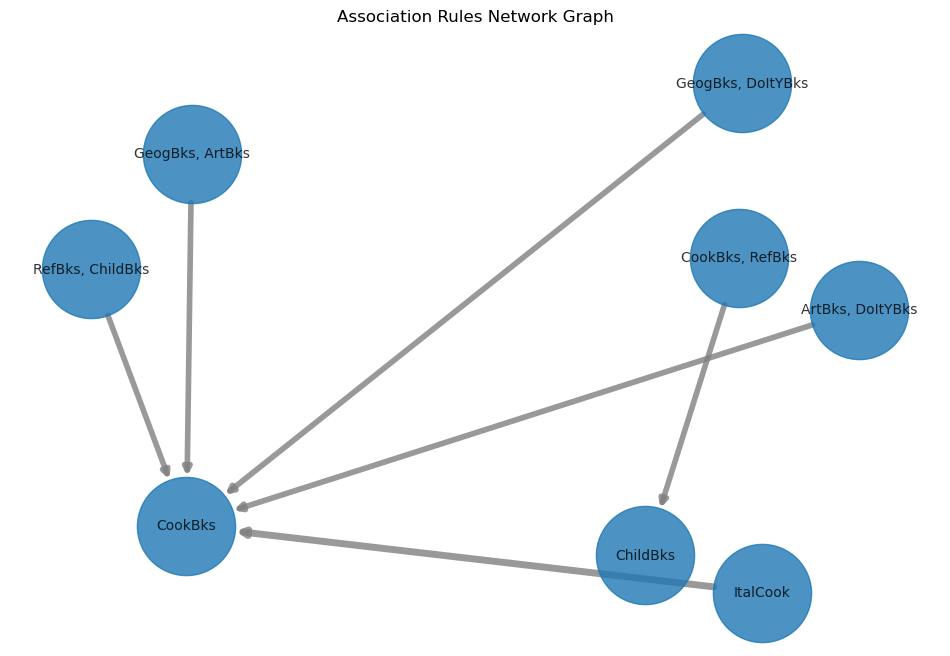

In [37]:
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes and edges to the graph
for idx, row in model.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['confidence'])

# Plotting the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=5000, edge_color='gray', alpha=0.8, font_size=10, width=[d['weight'] * 5 for (u, v, d) in G.edges(data=True)])
plt.title('Association Rules Network Graph')
plt.axis('off')
plt.show()